In [1]:
import pandas as pd

df=pd.read_csv(r"C:/Users\User\anaconda3\Credit_card_fraud/Credit_card_fraud/creditcard.csv")

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()
#According to the result obtained, no invalid values. 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

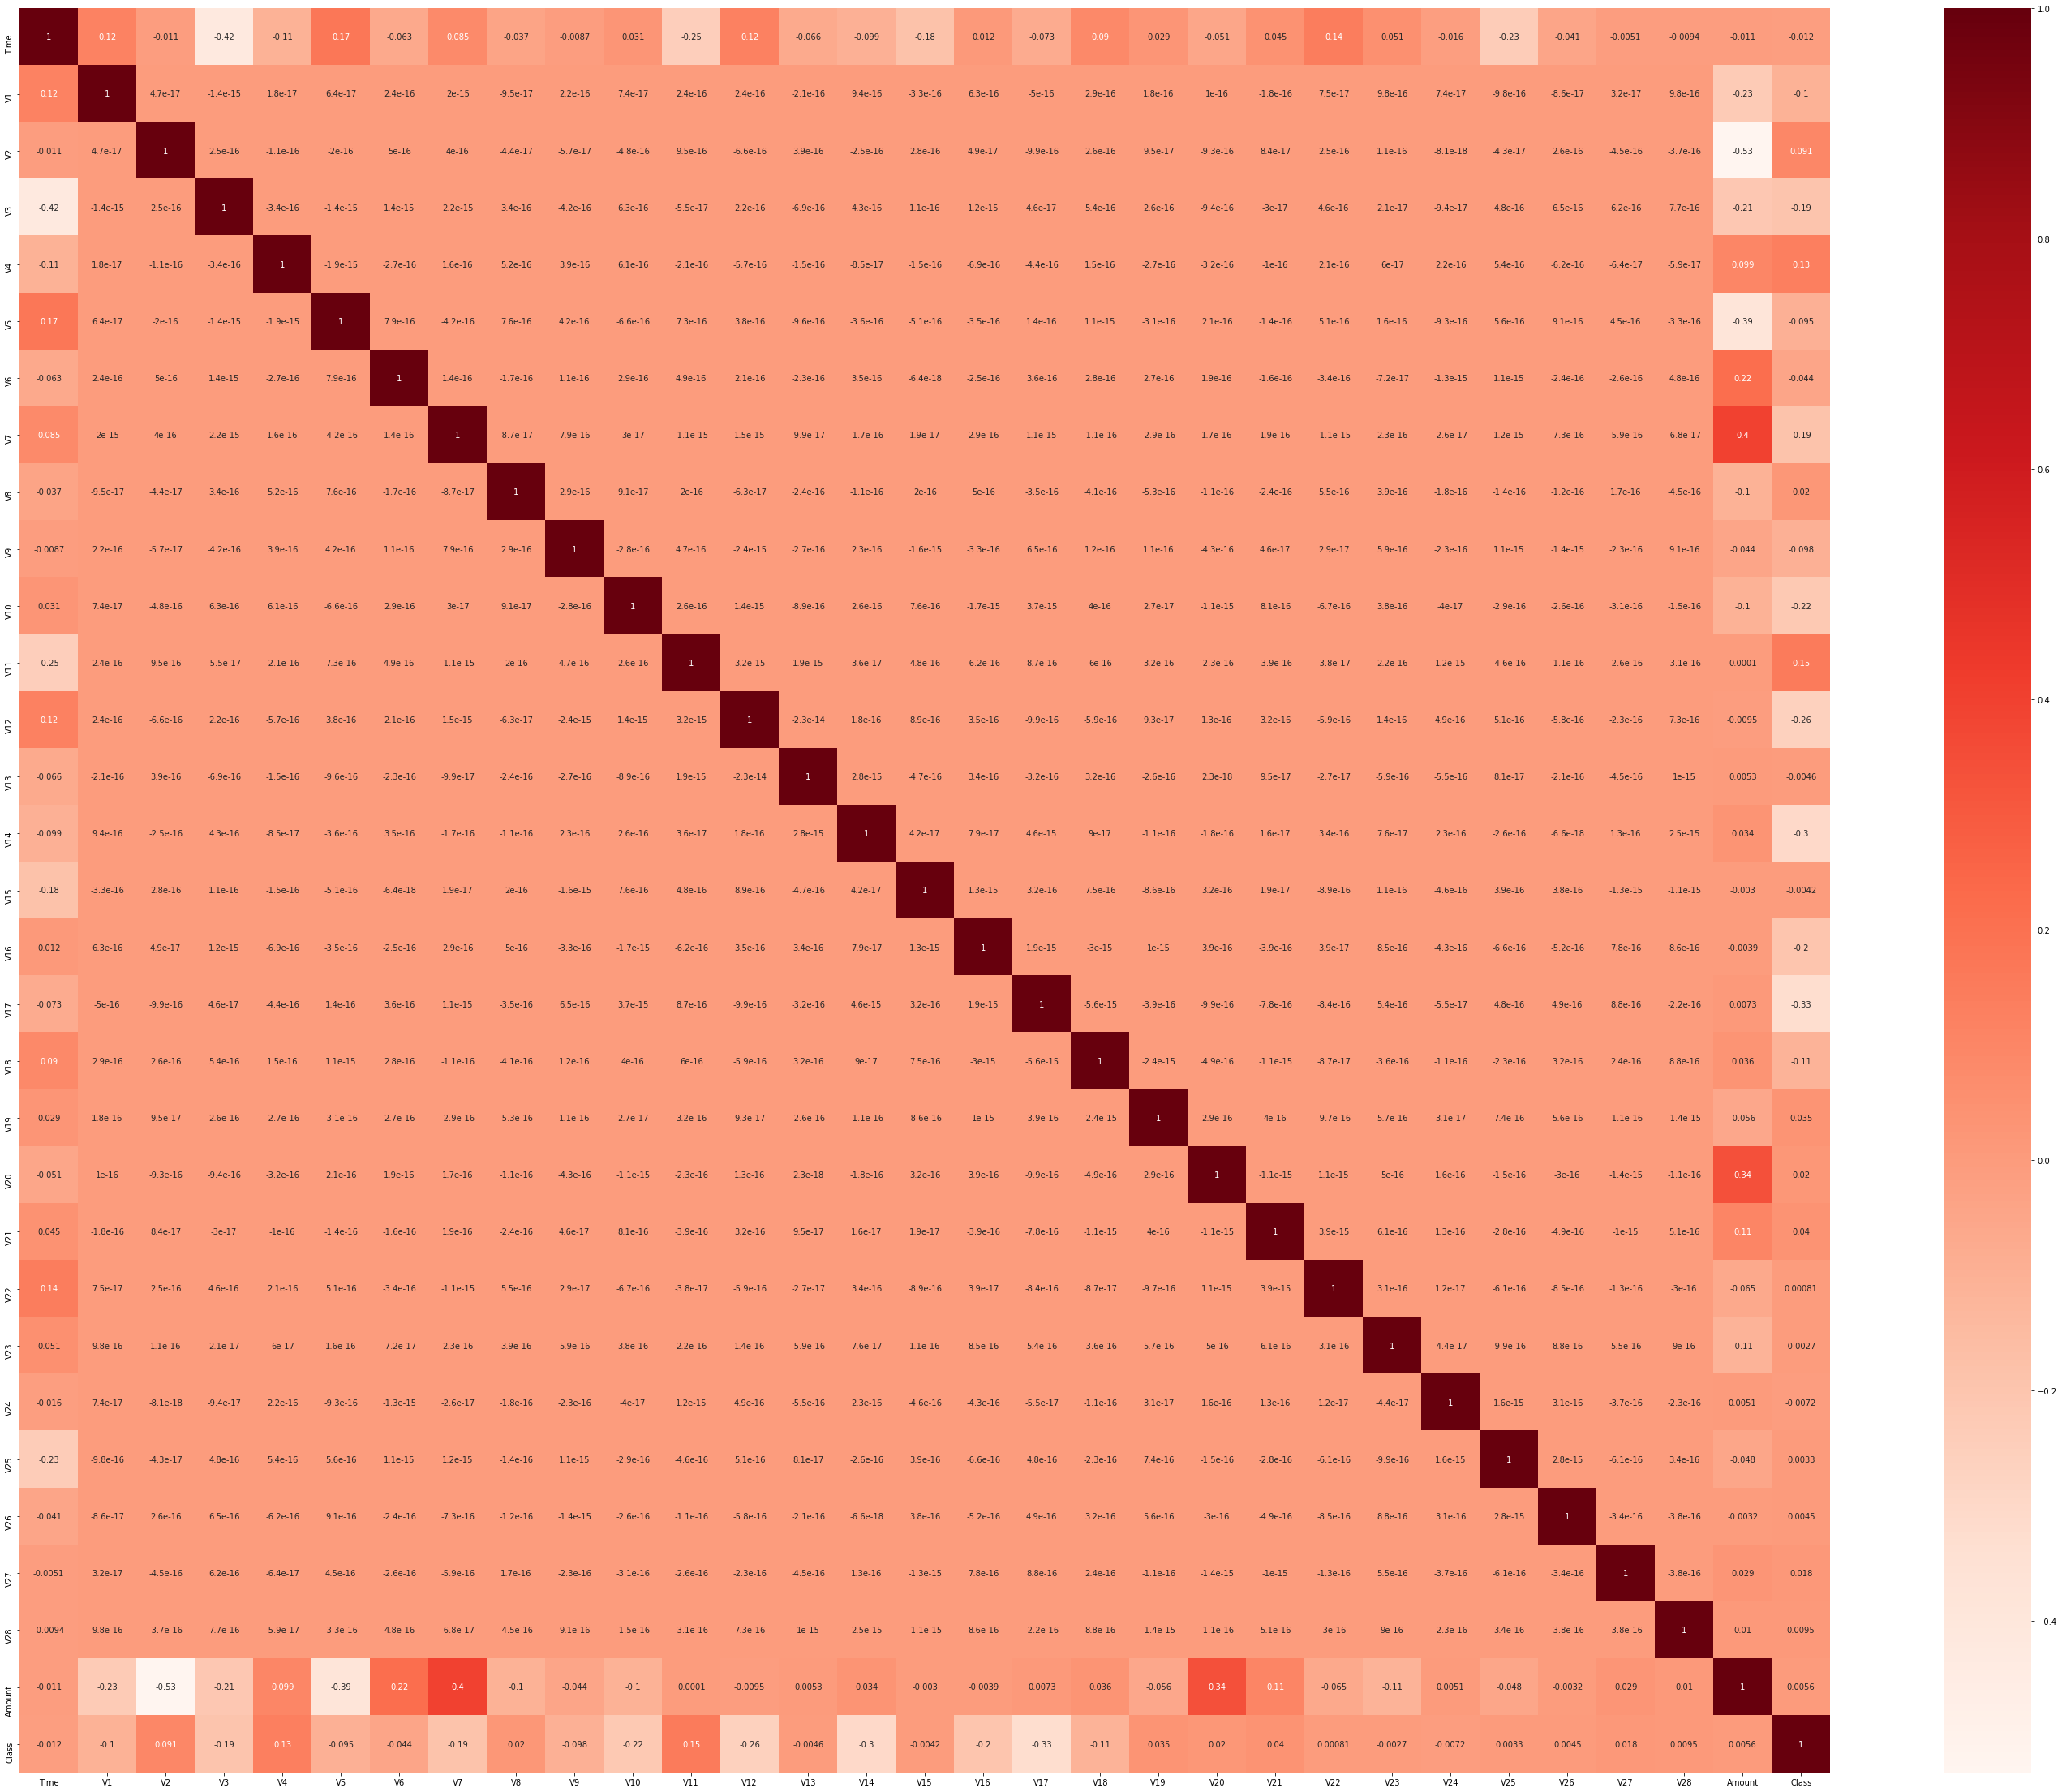

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 40))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
cor_target=abs(cor["Class"])
relevant_features=cor_target[cor_target>0.5]
relevant_features

Class    1.0
Name: Class, dtype: float64

In [15]:
print(df[['Time', 'Amount']].corr())
print(df[['Class', 'Time']].corr())

            Time    Amount
Time    1.000000 -0.010596
Amount -0.010596  1.000000
          Class      Time
Class  1.000000 -0.012323
Time  -0.012323  1.000000


In [97]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [18]:
y=df['Class']

In [20]:
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
train_data= df.drop(["Class"], axis=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [28]:
X=train_data.values
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [21]:
#df.head() Target Variable
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [29]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [32]:
from sklearn.linear_model import LinearRegression 

lr= LinearRegression ()
lr.fit(X_train, y_train)

print("The training accuracy: {:.3f}".format(lr.score(X_train, y_train)))
print("The testing accuracy: {:.3f}".format(lr.score(X_test, y_test)))

The training accuracy: 0.523
The testing accuracy: 0.518


In [33]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression ()
#instantiate
lr.fit(X_train, y_train)
#To get accurate result
print("The accurate training model: {:.3f}".format(lr.score(X_train, y_train)))
print("The accurate testing model: {:.3f}".format(lr.score(X_test, y_test)))

The accurate training model: 0.523
The accurate testing model: 0.518


In [34]:
#Since the training outcome is higher than testing. then it Overfits. 
#Stanardize the data  
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression ()
lr.fit(X_train_std, y_train)

print("The accurate training model: {:.3f}".format(lr.score(X_train_std, y_train)))
print("The accurate testing model: {:.3f}".format(lr.score(X_test_std, y_test)))

The accurate training model: 0.523
The accurate testing model: 0.518


In [35]:
# Using KNN to build the model
from sklearn.neighbors import KNeighborsClassifier

neigh=KNeighborsClassifier (n_neighbors=1, n_jobs=-1)

neigh.fit(X_train, y_train)
# Predicting KNN
pred= neigh.predict(X_test)
print("The accurate training model: {:.3f}".format(neigh.score(X_train, y_train)))
print("The accurate testing model: {:.3f}".format(neigh.score(X_test, y_test)))

The accurate training model: 1.000
The accurate testing model: 0.998


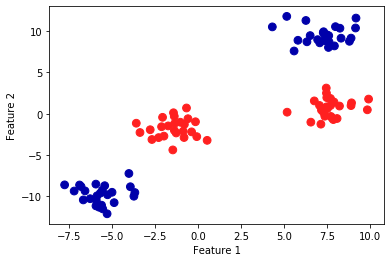

In [53]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

X, y = make_blobs(centers=4, random_state = 8)
y = y % 2

plt.scatter(X[:, 0], X[:, 1], c = y, s = 60, cmap = mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Text(0.5, 0, 'feature1 ** 2')

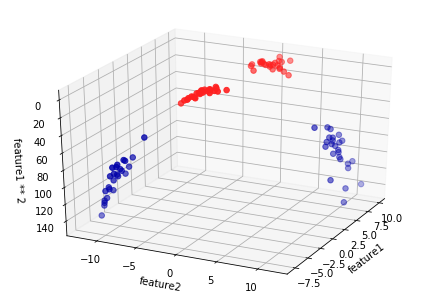

In [54]:
import numpy as np
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=30)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

In [51]:
from sklearn.svm import LinearSVC, SVC
lvc= LinearSVC (random_state=0)
lvcx= lvc.fit(X_train, y_train)


print("The training accuracy {:.3f}".format(lvcx.score(X_train, y_train)))
print("The testing accuracy {:.3f}".format(lvcx.score(X_test, y_test)))

The SVC training accuracy 0.998
The SVC testing accuracy 0.998


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
svc= SVC()
svcx=svc.fit(X_train, y_train)
svcy=svc.fit(X_test, y_test)

print("The training accuracy {:.3f}".format(svcx.score(X_train, y_train)))
print("The testing accuracy {:.3f}".format(svcy.score(X_test, y_test)))

The training accuracy 0.998
The testing accuracy 0.998


In [36]:
#Model Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, X, y, cv = 5, n_jobs=-1)

print("Cross-validation scores: {}".format(scores))
    

Cross-validation scores: [0.98239177 0.999526   0.99878864 0.99920999 0.99898176]


In [114]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [37]:
scores.mean()

0.9957796319665395

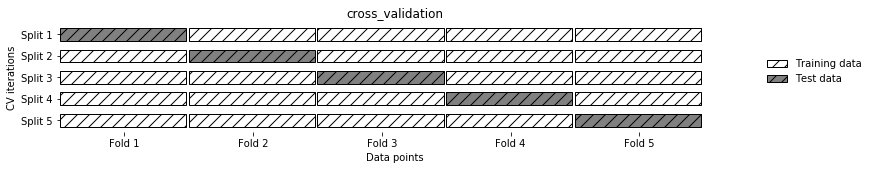

In [116]:
import mglearn
mglearn.plots.plot_cross_validation()

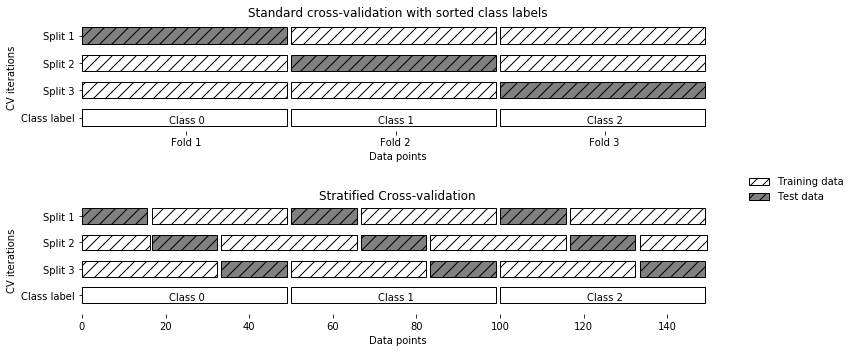

In [117]:
mglearn.plots.plot_stratified_cross_validation()

In [56]:
from sklearn.decomposition import PCA

# suppose we want to keep just 2 principal components of the data
pca = PCA(n_components=2, random_state = 0)

# transform the data
X_pca = pca.fit_transform(X_train)

# check the shape of both the original data and the transformed one
print("Dimension of the original data: {}".format(X_train.shape))
print("Dimension of the transformed data: {}".format(X_pca.shape))

Dimension of the original data: (199364, 30)
Dimension of the transformed data: (199364, 2)


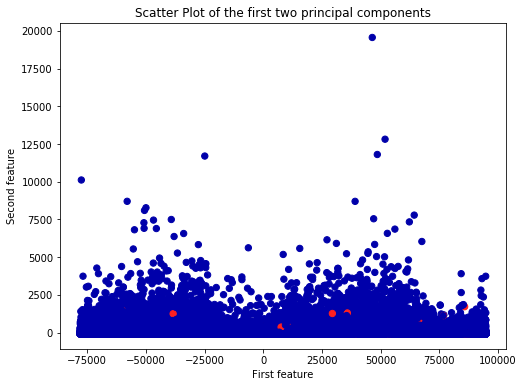

In [58]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize = (8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, s = 40, cmap = mglearn.cm2)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Scatter Plot of the first two principal components")
plt.show()

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_train)), X_train, rotation = 60, ha = 'left')
#plt.suptitle("pca_components_cancer")
plt.show()

NameError: name 'pca' is not defined

In [44]:
from sklearn.
pca.explained_variance_ratio_.sum()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


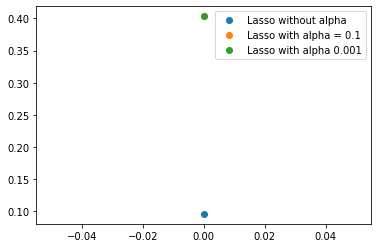

In [46]:
import matplotlib.pyplot as plt
plt.plot(l1.coef_, 'o', label = 'Lasso without alpha' )
plt.plot(l11.coef_, 'o', label = 'Lasso with alpha = 0.1')
plt. plot(l11.coef_, 'o', label = 'Lasso with alpha 0.001')
plt.legend(loc = 'best')
plt.show()

In [50]:
import numpy as np
print("number of features without alpha: {:.3f} ".format(np.sum(l1.coef_ !=0)))
print("number of features with alpha 0.1: {:.3f}".format(np.sum(l11.coef_ !=0)))
print("number of features with alpha 0.001: {:.3f}".format(np.sum(l11.coef_ !=0)))

number of features without alpha: 1.000 
number of features with alpha 0.1: 1.000


NameError: name 'l111' is not defined